In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('../train_data_hand-gestures.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X.shape ,y.shape

((27455, 784), (27455,))

In [3]:
num_classes = len(np.unique(y))
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype('float32') / 255.0
#X_val = X_val.astype('float32') / 255.0

X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32')
X_val = X_val.reshape((-1, 28, 28, 1)).astype('float32')

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes+1)
y_val = tf.keras.utils.to_categorical(y_val, num_classes+1)

In [25]:
from tensorflow.keras import layers, models, optimizers, Input
from tensorflow.keras.optimizers import Adam

model = models.Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (1, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(32, (1, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 1), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes+1, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy',  metrics=['accuracy'])

model.summary()

print(X_train.shape, y_train.shape)
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_val, y_val))
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy}')

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 28, 26, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 26, 26, 32)     │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 13, 11, 32)     │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 11, 11, 32)     │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,449 (450.97 KB)

 Trainable params: 115,321 (450.47 KB)

 Non-trainable params: 128 (512.00 B)

(21964, 28, 28, 1) (21964, 25)
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step - accuracy: 0.0609 - loss: 4.3228 - val_accuracy: 0.0656 - val_loss: 3.5115
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 313ms/step - accuracy: 0.1466 - loss: 2.9069 - val_accuracy: 0.1031 - val_loss: 3.1091
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 309ms/step - accuracy: 0.2744 - loss: 2.3580 - val_accuracy: 0.2743 - val_loss: 3.9088
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 312ms/step - accuracy: 0.4354 - loss: 1.7524 - val_accuracy: 0.4804 - val_loss: 3.0881
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 307ms/step - accuracy: 0.5655 - loss: 1.3113 - val_accuracy: 0.5425 - val_loss: 4.4752
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 14s 319ms/step - accuracy: 0.6462 - loss: 1.0319 - val_accuracy: 0.5906 - val_loss: 5.7876
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 308ms/step - accuracy: 0.7081 - loss: 0.8481 - val_accuracy: 0.6389 - val_loss: 7.6128
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 303ms/step - accuracy: 0

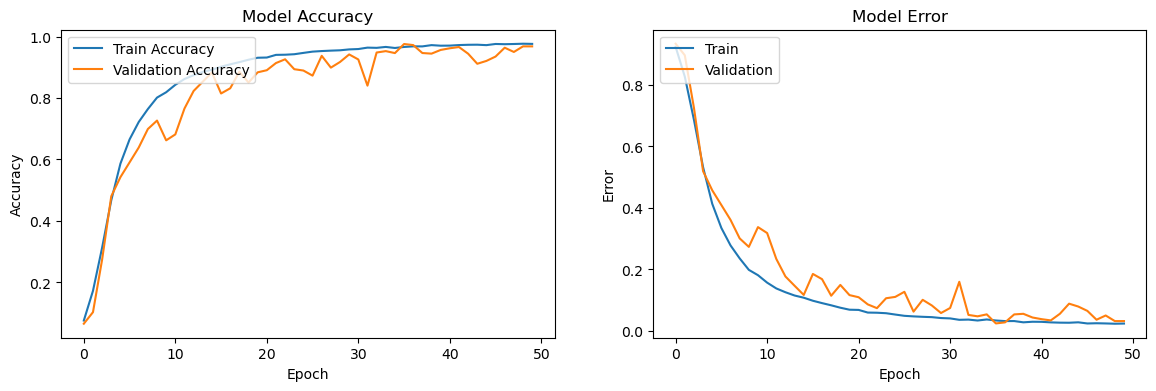

In [27]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

train_error = 1 - np.array(history.history['accuracy'])
val_error = 1 - np.array(history.history['val_accuracy'])

plt.subplot(1, 2, 2)
plt.plot(train_error, label='Train Error')
plt.plot(val_error, label='Validation Error')
plt.title('Model Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.savefig('cnn3', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
df_test = pd.read_csv('../test_data_hand-gestures.csv')
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values
X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)).astype('float32')
y_test = tf.keras.utils.to_categorical(y_test, num_classes+1)
X_test.shape ,y_test.shape


((7172, 28, 28, 1), (7172, 25))

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9630 - loss: 0.1786


225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step


<Figure size 640x480 with 0 Axes>

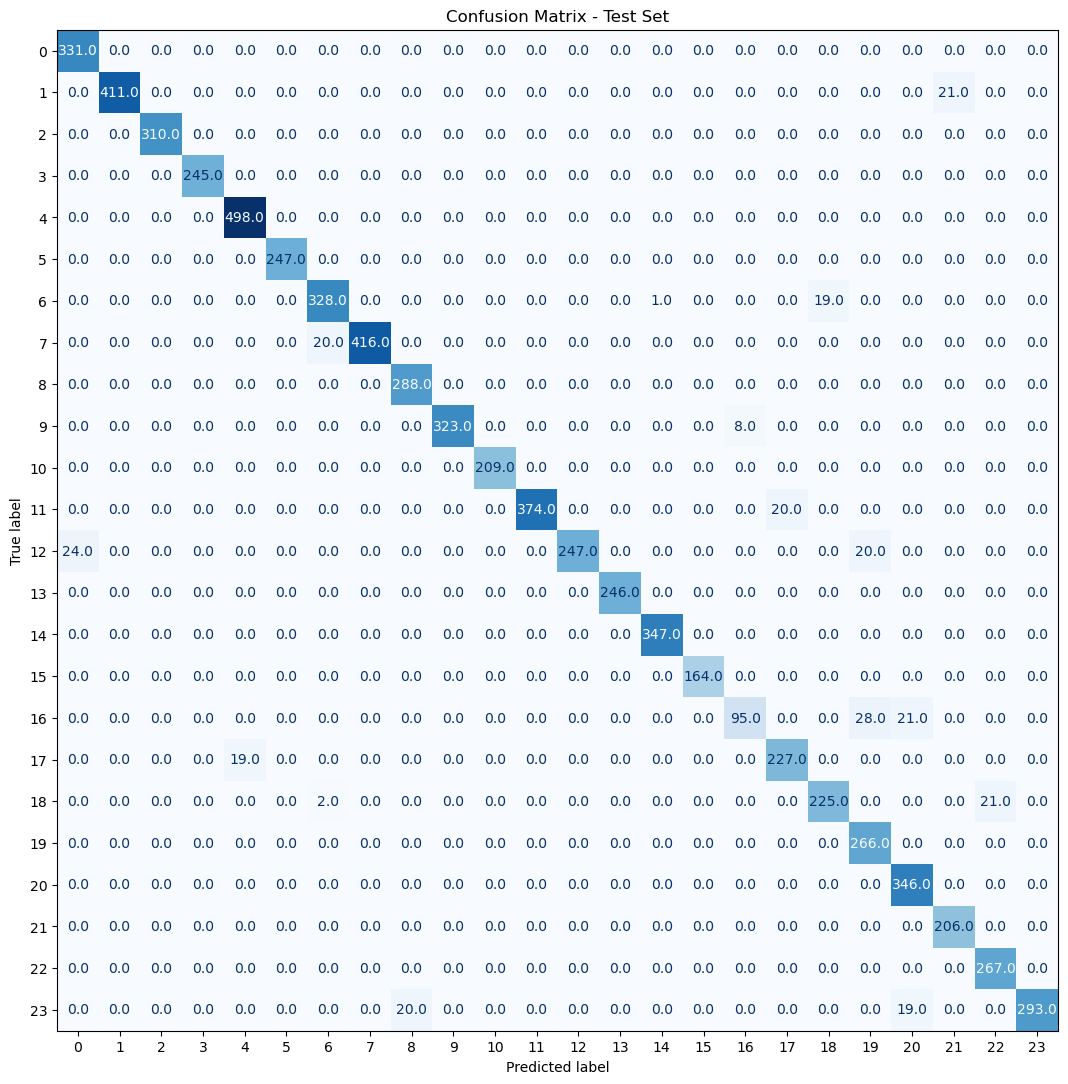

<Figure size 1300x1300 with 0 Axes>

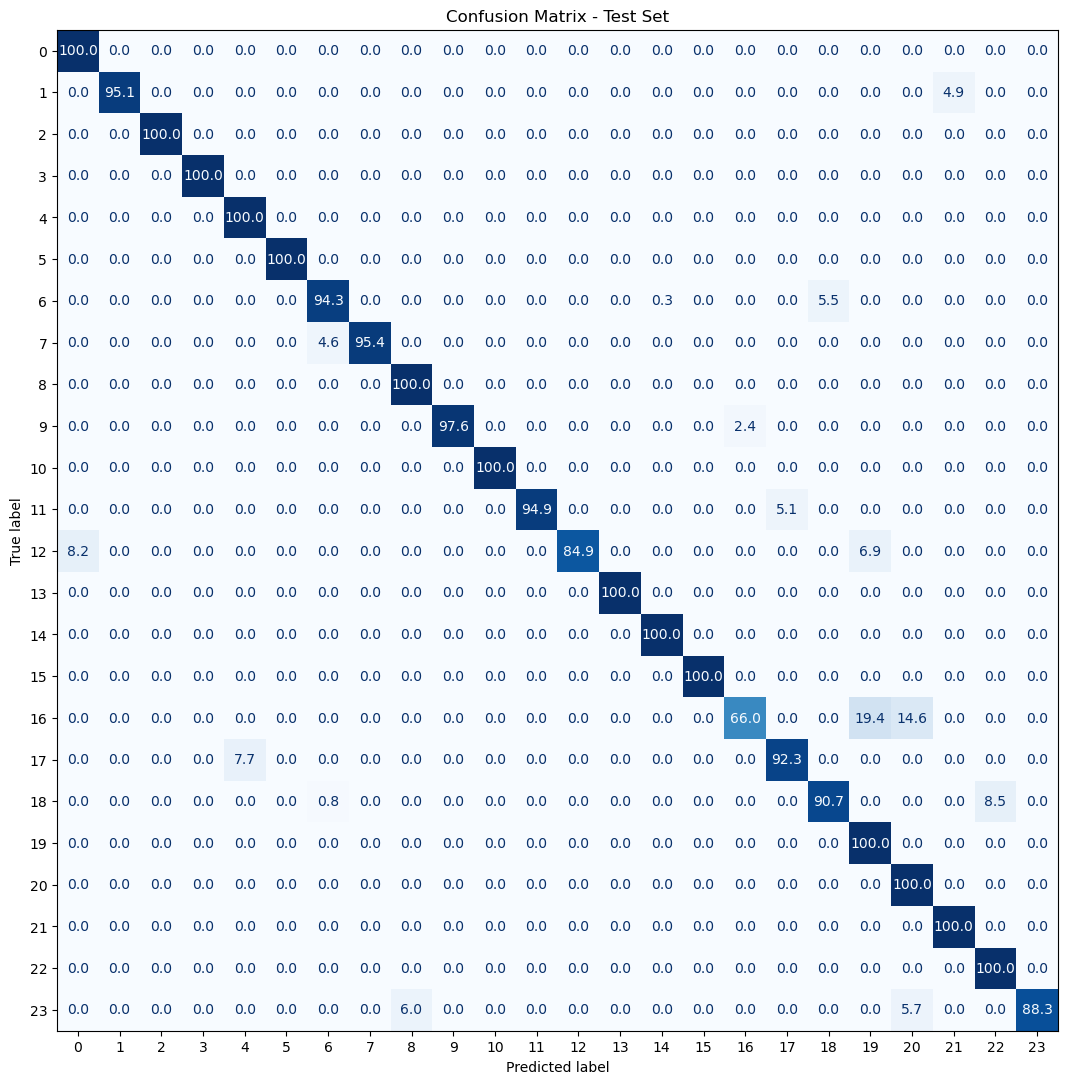

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test_pred = model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_argmax = np.argmax(y_test, axis=1)

cm_test = confusion_matrix(y_test_argmax, y_test_pred_classes)
cm_test_percent = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis] * 100

plt.figure()
plt.rcParams['figure.figsize'] = [13, 13]
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=np.arange(24))
disp_test.plot(cmap=plt.cm.Blues,colorbar=False , values_format='.1f')
plt.title('Confusion Matrix - Test Set')
plt.savefig('cnn3 cm', dpi=300, bbox_inches='tight')
plt.show()

plt.figure()
plt.rcParams['figure.figsize'] = [13, 13]
disp_test = ConfusionMatrixDisplay(cm_test_percent, display_labels=np.arange(24))
disp_test.plot(cmap=plt.cm.Blues,colorbar=False , values_format='.1f')
plt.title('Confusion Matrix - Test Set')
plt.show()